Nama : Wanda Febrina Cahya <BR>
No / Kelas : 29 / TI-3E<BR>
NIM : 2141720001<BR>
KUIS 1 MACHINE LEARNING

# Kasus - Klasifikasi Tulisan Tangan dengan Dataset MNIST

## Deskripsi Umum
Anda diminta untuk melakukan klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM untuk merekognisi tulisan tangan dari dataset MNIST

## Tentang Dataset MNIST

Dataset MNIST (Modified National Institute of Standards and Technology) merupakan dataset berupa citra grayscale dengan ukuran 28x28 yang berisi tulisan tangan dari digit angka 0-9. Jumlah data dalam dataset ini adalah 70.000 data.

## Detail Kuis

1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
    - Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
    - Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

4. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
   - Anda diperbolehkan untuk melakukan tunning parameter.
   - Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

5. Evaluasi model yang Anda buat terhadap data training dan data testing.
   - Gunakan metric *accuracy* untuk mengetahui tingkat akurasi data training dan data testing.
   - Gunakan fungsi *classification_report* untuk mengetahui performa model secara holistik.
   - Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

6. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

7. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!

# Bantuan

Berikut merupakan kode bantuan untuk proses mengunduh dataset MNIST

In [3]:
# Unduh Dataset MNIST
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
# Baca deskripsi dataset
# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [5]:
# Inspeksi semua key dalam dataset
# Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

# Import Library

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import fetch_openml

# Nomor 1

Jumlah data untuk label 0: 6903
Jumlah data untuk label 1: 7877
Jumlah data untuk label 2: 6990
Jumlah data untuk label 3: 7141
Jumlah data untuk label 4: 6824
Jumlah data untuk label 5: 6313
Jumlah data untuk label 6: 6876
Jumlah data untuk label 7: 7293
Jumlah data untuk label 8: 6825
Jumlah data untuk label 9: 6958


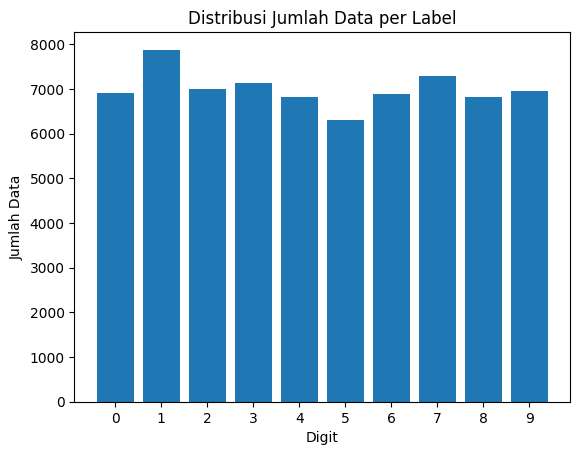

In [7]:
# Menghitung jumlah data untuk setiap label (0-9)
label_counts = np.bincount(mnist.target.astype(int))

# Menampilkan jumlah data untuk setiap label
for i in range(10):
    print(f"Jumlah data untuk label {i}: {label_counts[i]}")

# Visualisasi distribusi jumlah data per label
plt.bar(range(10), label_counts, tick_label=range(10))
plt.xlabel('Digit')
plt.ylabel('Jumlah Data')
plt.title('Distribusi Jumlah Data per Label')
plt.show()

Berdasarkan perhitungan dan diagram batang, setiap label angka (0 hingga 9) pada dataset MNIST memiliki proporsi data yang relatif mendekati satu sama lain, dengan perbedaan yang tidak signifikan antara label-labelnya. Oleh karena itu, tidak imbalance data pada dataset MNIST ini, karena semua label memiliki jumlah data yang cukup serupa dalam proporsinya yaitu dengan jumlah sampel 6000-8000 data.

# Nomor 2

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


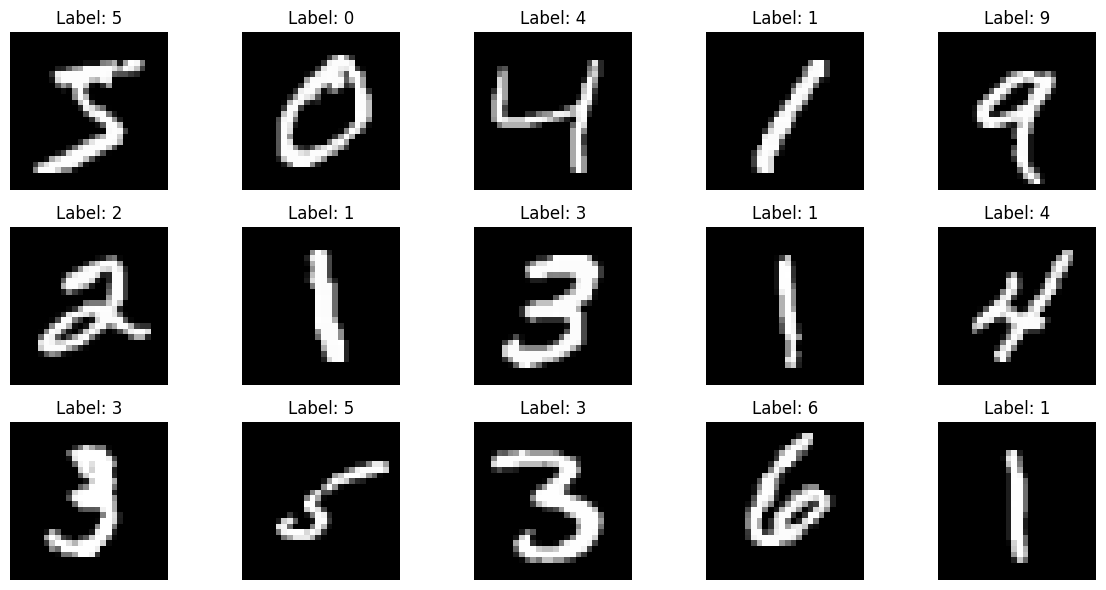

In [8]:
from sklearn.preprocessing import StandardScaler

# Membuat objek StardScaler
std = StandardScaler()

# Mengunduh dataset MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# Mengambil data dan label
X = mnist.data
y = mnist.target

# Menampilkan 15 citra pertama berserta labelnya
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(mnist.data[i].reshape(28, 28), cmap='gray')  # Menampilkan citra
    plt.title(f'Label: {mnist.target[i]}')  # Menampilkan label
    plt.axis('off')

plt.tight_layout()
plt.show()

# Nomor 3

In [9]:
# Menghitung histogram untuk setiap gambar
histograms = np.array([np.histogram(image.reshape(28, 28), bins=256, range=(0, 256))[0] for image in X])

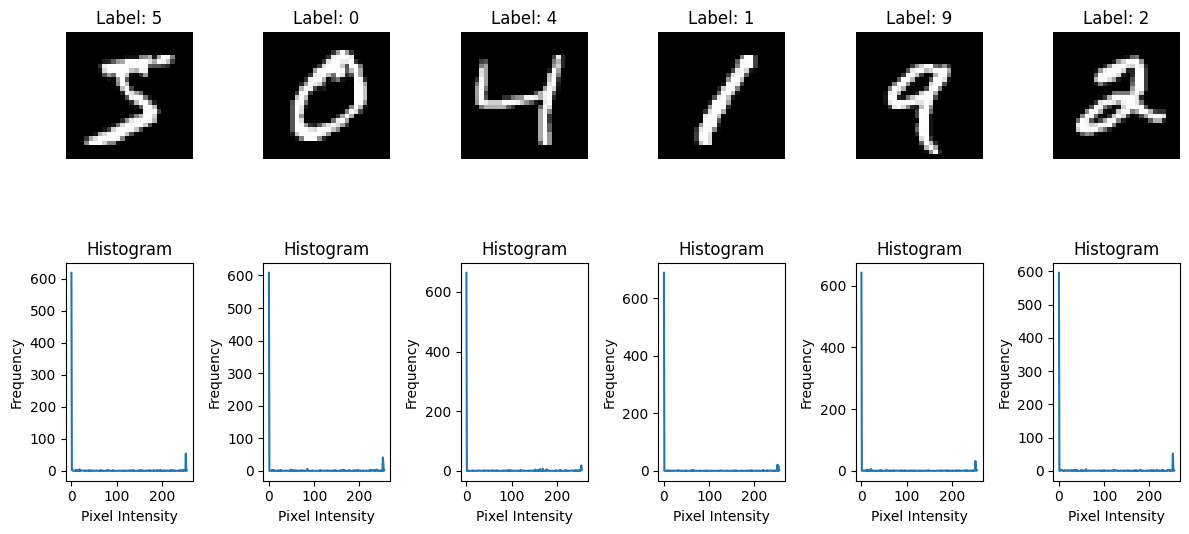

In [10]:
# Jumlah gambar yang akan ditampilkan
num_images_to_display = 6

# Membuat sebuah figure dengan ukuran 12x8
plt.figure(figsize=(12, 8))

# Loop melalui gambar yang akan ditampilkan
for i in range(num_images_to_display):
    # Subplot pertama (gambar)
    plt.subplot(3, num_images_to_display, i + 1)
    # Menampilkan gambar dalam skala abu-abu
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    # Menambahkan judul dengan label dari data
    plt.title(f'Label: {y[i]}')
    # Menghilangkan sumbu x dan y
    plt.axis('off')

    # Subplot kedua (histogram)
    plt.subplot(3, num_images_to_display, num_images_to_display + i + 1)
    # Menampilkan histogram untuk gambar ke-i
    plt.plot(histograms[i])
    # Menambahkan judul 'Histogram'
    plt.title('Histogram')
    # Menambahkan label sumbu x dan y pada histogram
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

# Mengatur tata letak agar tampilan lebih rapi
plt.tight_layout()
# Menampilkan gambar dan histogram
plt.show()

# Nomor 4

In [11]:
# Scaling data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [12]:

# Split data menjadi data training dan data testing dengan rasio 70:30
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Split data menjadi data training dan data testing dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Split data menjadi data training dan data testing dengan rasio 90:10
X_train_90, X_test_90, y_train_90, y_test_90 = train_test_split(X_scaled, y, test_size=0.1, random_state=42)


# Nomor 5 -7
## Permodelan Rasio 80:20
**Metode Naive Bayes**

In [13]:
#import library
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline


In [14]:
# Membuat objek PCA dengan parameter:
# - n_components: Jumlah komponen utama yang akan dipertahankan setelah PCA
# - whiten: Menyatakan apakah komponen utama harus di-"whiten" (dinormalisasi)
# - random_state: Untuk mengontrol inisialisasi yang acak
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)

# Membuat objek Gaussian Naive Bayes (NB)
nb = GaussianNB()

# Membuat model pipa (pipeline) yang menggabungkan PCA dan NB
# PCA digunakan untuk mereduksi dimensi data sekaligus normalisasi data
model = make_pipeline(pca, nb)

# Melatih model menggunakan data pelatihan (X_train, y_train)
model.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=150, random_state=42, whiten=True)),
                ('gaussiannb', GaussianNB())])

### Evaluasi Model

In [15]:
#Melakukan prediksi pada test set
y_pred = model.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 14000 points : 2026


In [17]:
# Menghitung akurasi model dengan membandingkan label aktual (y_test) dengan label yang diprediksi (y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Mencetak nilai akurasi ke layar
print("Accuracy:", accuracy)

# Mencetak laporan klasifikasi yang mencakup berbagai metrik evaluasi seperti presisi, recall, F1-score, dan lainnya.
# Laporan ini membandingkan label aktual (y_test) dengan label yang diprediksi (y_pred).
print(classification_report(y_test, y_pred))

Accuracy: 0.8552857142857143
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1343
           1       0.98      0.93      0.96      1600
           2       0.67      0.86      0.75      1380
           3       0.83      0.83      0.83      1433
           4       0.87      0.81      0.84      1295
           5       0.79      0.82      0.80      1273
           6       0.94      0.89      0.91      1396
           7       0.91      0.83      0.87      1503
           8       0.86      0.84      0.85      1357
           9       0.80      0.82      0.81      1420

    accuracy                           0.86     14000
   macro avg       0.86      0.85      0.86     14000
weighted avg       0.86      0.86      0.86     14000



### Confussion Matrix

Text(113.9222222222222, 0.5, 'predicted label')

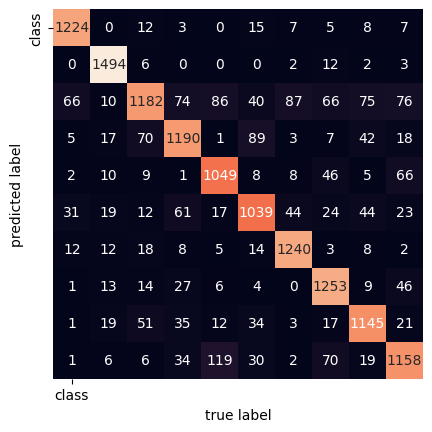

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Membuat confusion matrix dengan membandingkan label aktual (y_test) dengan label yang diprediksi (y_pred)
mat = confusion_matrix(y_test, y_pred)

# Menggunakan Seaborn untuk membuat heatmap dari confusion matrix
# Parameter T digunakan untuk mentransposisi matriks agar label sumbu x dan y sesuai
# Parameter square=True digunakan agar heatmap berbentuk persegi (sebaliknya akan berbentuk persegi panjang)
# Parameter annot=True digunakan untuk menampilkan angka pada sel heatmap
# Parameter fmt='d' digunakan untuk memformat angka di sel sebagai bilangan bulat
# Parameter cbar=False digunakan untuk menghilangkan color bar pada sisi
# Parameter xticklabels dan yticklabels digunakan untuk menambahkan label pada sumbu x dan y berdasarkan target names (mnist.target_names)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=mnist.target_names,
            yticklabels=mnist.target_names)

# Memberikan label pada sumbu x
plt.xlabel('true label')

# Memberikan label pada sumbu y
plt.ylabel('predicted label')

### Pelabelan Citra

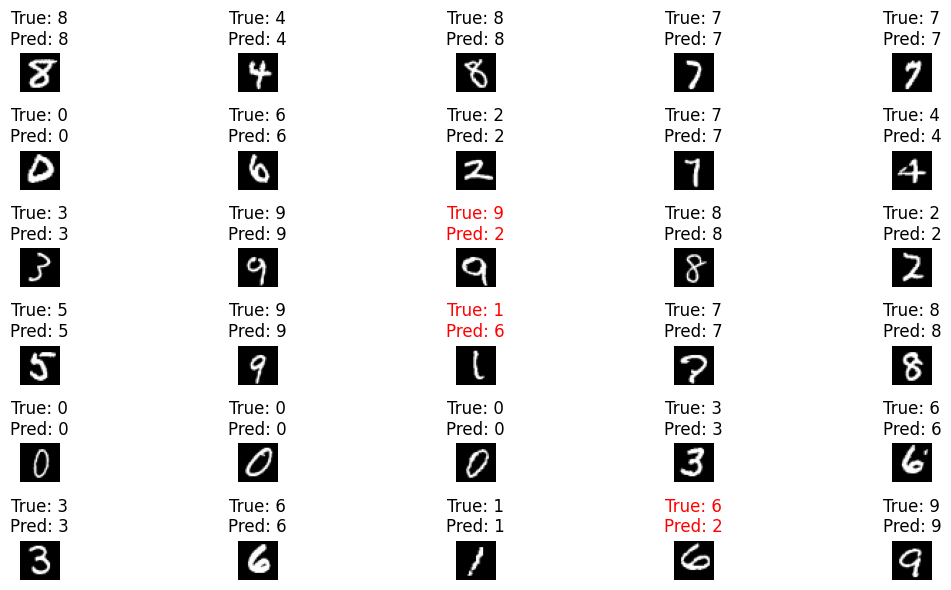

In [19]:
#Pelabelan Citra

# Menentukan jumlah gambar yang akan ditampilkan
n = 30

# Membuat figur dengan ukuran 12x6
plt.figure(figsize=(12, 6))

# Loop melalui 30 gambar pertama dari data uji
for i in range(n):
    
    # Membagi grid subplot menjadi 6 baris dan 5 kolom, dan mengatur indeks subplot sesuai dengan perulangan
    plt.subplot(6, 5, i + 1)
    
    # Menampilkan gambar dari data uji dalam skala abu-abu
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")

    # Menentukan warna teks berdasarkan label yang benar atau label yang diprediksi
    true_label = y_test.iloc[i] if isinstance(y_test, pd.Series) else y_test[i]
    pred_label = y_pred.iloc[i] if isinstance(y_pred, pd.Series) else y_pred[i]

    # Teks berwarna hitam jika prediksi benar, dan berwarna merah jika salah
    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis("off")

# Mengatur tata letak agar tampilan lebih rapi
plt.tight_layout()
plt.show()

**Metode SVM**

In [20]:
# Membuat objek SVM dengan parameter-parameter berikut:
# - C: Parameter penalti yang mengendalikan trade-off antara kesalahan klasifikasi pada data pelatihan dan margin maksimum.
# - gamma: Parameter yang mengontrol seberapa besar dampak setiap sampel terhadap pemisahan hyperplane.
# - kernel: Jenis kernel yang digunakan. Dalam kasus ini, digunakan kernel linear.
svc = SVC(C=5.0, gamma=0.05, kernel='linear')  

# Melatih model SVM menggunakan data pelatihan (X_train, y_train)
svc.fit(X_train, y_train)

SVC(C=5.0, gamma=0.05, kernel='linear')

### Evaluasi Model

In [21]:
# Melakukan prediksi pada data uji (X_test) menggunakan model SVM yang telah dilatih (svc)
y_pred = svc.predict(X_test)

# Menghitung akurasi dengan membandingkan label aktual (y_test) dengan label yang diprediksi (y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Mencetak laporan klasifikasi yang mencakup berbagai metrik evaluasi seperti presisi, recall, F1-score, dan lainnya.
# Laporan ini membandingkan label aktual (y_test) dengan label yang diprediksi (y_pred).
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9276428571428571
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1343
           1       0.95      0.98      0.96      1600
           2       0.90      0.91      0.91      1380
           3       0.90      0.92      0.91      1433
           4       0.92      0.94      0.93      1295
           5       0.89      0.90      0.89      1273
           6       0.96      0.94      0.95      1396
           7       0.94      0.94      0.94      1503
           8       0.92      0.86      0.89      1357
           9       0.93      0.90      0.92      1420

    accuracy                           0.93     14000
   macro avg       0.93      0.93      0.93     14000
weighted avg       0.93      0.93      0.93     14000



### Confussion Matrix

Text(113.9222222222222, 0.5, 'predicted label')

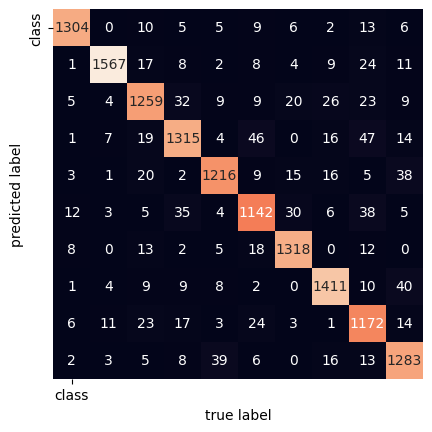

In [25]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=mnist.target_names,
            yticklabels=mnist.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

### Pelabelan Citra

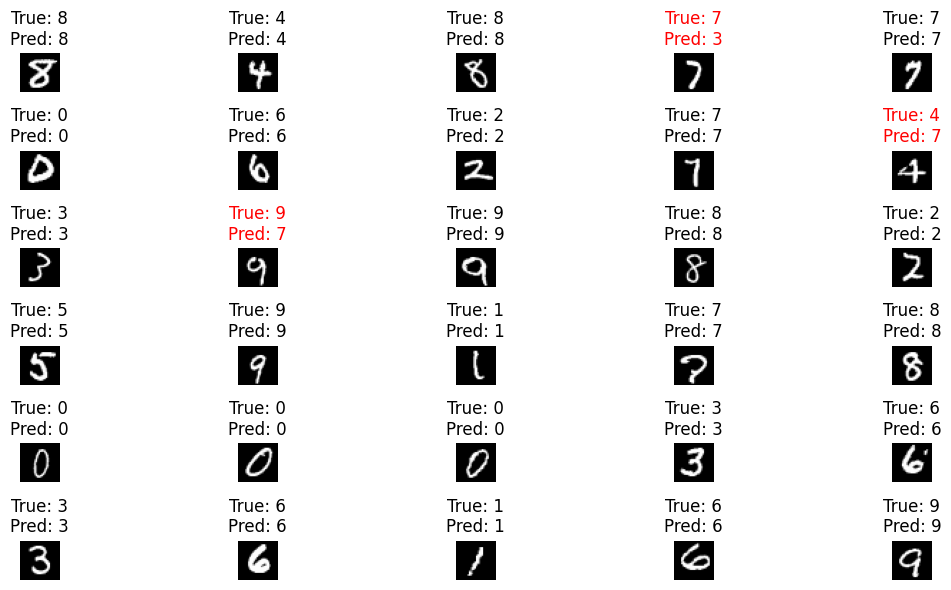

In [26]:
n_samples_to_display = 30
plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")

    true_label = y_test.iloc[i] if isinstance(y_test, pd.Series) else y_test[i]
    pred_label = y_pred.iloc[i] if isinstance(y_pred, pd.Series) else y_pred[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis("off")

plt.tight_layout()
plt.show()

## Permodelan Rasio 70:30
**Metode Naive Bayes**

In [ ]:
# Melatih model menggunakan data pelatihan (X_train, y_train)
model.fit(X_train_70, y_train_70)

### Evaluasi Model

In [27]:
#Melakukan prediksi pada test set
y_pred_70 = model.predict(X_test_70)
print("Number of mislabeled points out of a total %d points : %d"% (X_test_70.shape[0], (y_test_70 != y_pred_70).sum()))

Number of mislabeled points out of a total 21000 points : 3019


In [29]:
#Melihat akurasi model

accuracy = accuracy_score(y_test_70, y_pred_70)
print("Accuracy:", accuracy)

print(classification_report(y_test_70, y_pred_70))

Accuracy: 0.8562380952380952
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      2058
           1       0.98      0.94      0.96      2364
           2       0.69      0.86      0.76      2133
           3       0.83      0.83      0.83      2176
           4       0.88      0.82      0.85      1936
           5       0.79      0.82      0.80      1915
           6       0.94      0.89      0.91      2088
           7       0.92      0.83      0.87      2248
           8       0.85      0.84      0.84      1992
           9       0.80      0.82      0.81      2090

    accuracy                           0.86     21000
   macro avg       0.86      0.85      0.86     21000
weighted avg       0.86      0.86      0.86     21000



### Confussion Matrix

Text(113.9222222222222, 0.5, 'predicted label')

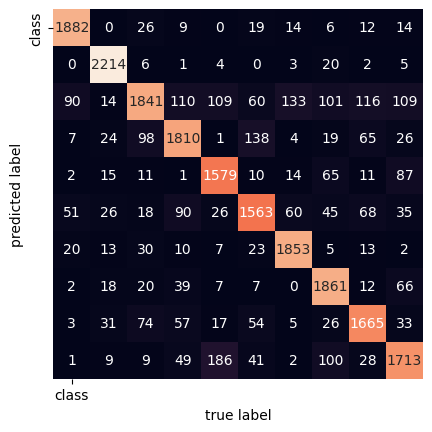

In [30]:
#Confussion Matrix
mat2 = confusion_matrix(y_test_70, y_pred_70)
sns.heatmap(mat2.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=mnist.target_names,
            yticklabels=mnist.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

### Pelabelan Citra

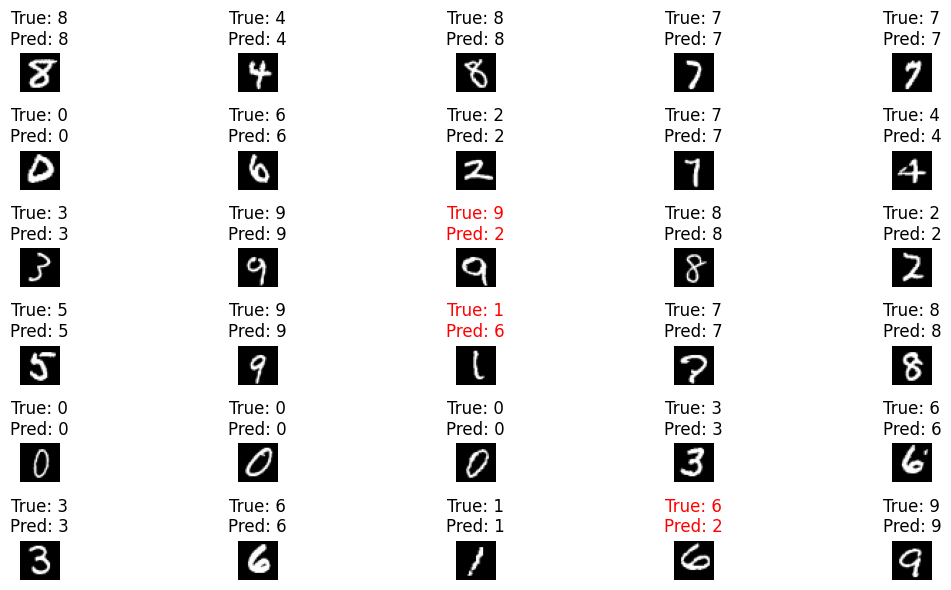

In [31]:
n_samples_to_display = 30
plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_test_70[i].reshape(28, 28), cmap="gray")
    
    true_label = y_test_70.iloc[i] if isinstance(y_test_70, pd.Series) else y_test_70[i]
    pred_label = y_pred_70.iloc[i] if isinstance(y_pred_70, pd.Series) else y_pred_70[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis("off")

plt.tight_layout()
plt.show()

**Metode SVM**

In [33]:
svc = SVC(C=1, gamma=0.001, kernel='linear')  
svc.fit(X_train_70, y_train_70)

SVC(C=1, gamma=0.001, kernel='linear')

### Evaluasi Model

In [34]:
# Predict on the test set
y_pred_70 = svc.predict(X_test_70)

# Calculate accuracy
accuracy_70 = accuracy_score(y_test_70, y_pred_70)
print("Accuracy:", accuracy_70)

# Display classification report
print("Classification Report:")
print(classification_report(y_test_70, y_pred_70))

Accuracy: 0.9346666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2058
           1       0.95      0.98      0.97      2364
           2       0.91      0.93      0.92      2133
           3       0.91      0.92      0.91      2176
           4       0.93      0.94      0.94      1936
           5       0.91      0.89      0.90      1915
           6       0.97      0.95      0.96      2088
           7       0.94      0.95      0.95      2248
           8       0.93      0.89      0.91      1992
           9       0.93      0.91      0.92      2090

    accuracy                           0.93     21000
   macro avg       0.93      0.93      0.93     21000
weighted avg       0.93      0.93      0.93     21000



### Confussion Matrix

Text(113.9222222222222, 0.5, 'predicted label')

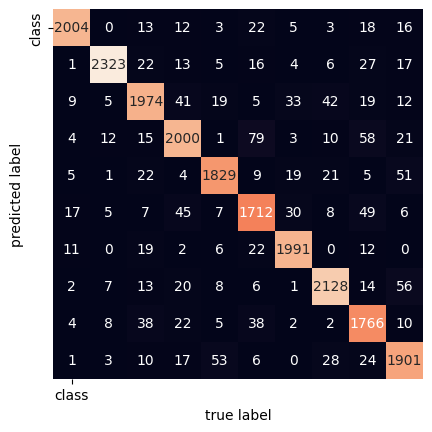

In [35]:

cm70 = confusion_matrix(y_test_70, y_pred_70)
sns.heatmap(cm70.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=mnist.target_names,
            yticklabels=mnist.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

### Pelabelan Citra

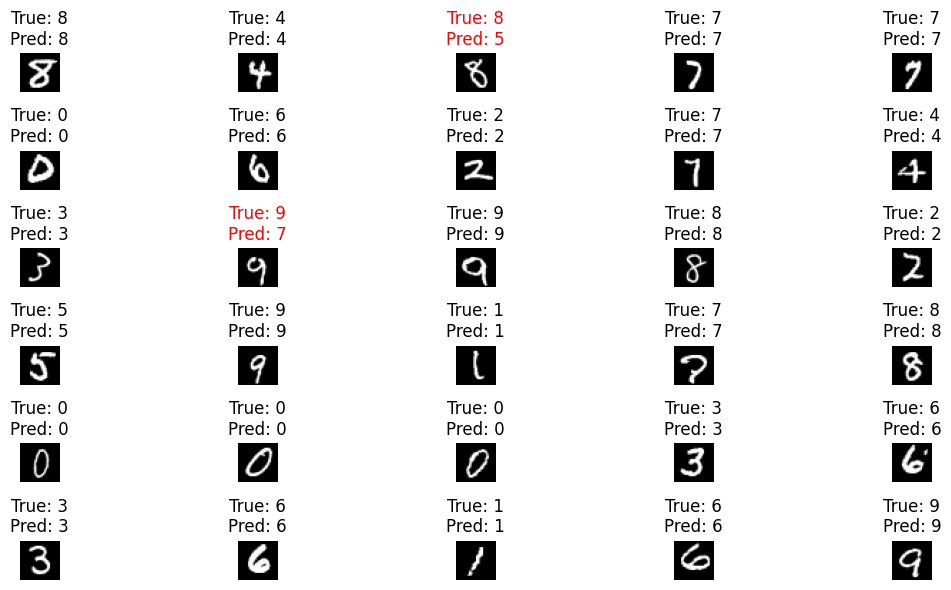

In [36]:
n_samples_to_display = 30
plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_test_70[i].reshape(28, 28), cmap="gray")

    true_label = y_test_70.iloc[i] if isinstance(y_test_70, pd.Series) else y_test_70[i]
    pred_label = y_pred_70.iloc[i] if isinstance(y_pred_70, pd.Series) else y_pred_70[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis("off")

plt.tight_layout()
plt.show()

## Permodelan Rasio 90:10
**Metode Naive Bayes**

In [ ]:
# Melatih model menggunakan data pelatihan (X_train, y_train)
model.fit(X_train_70, y_train_70)

### Evaluasi Model

In [37]:
#Melakukan prediksi pada test set
y_pred_90 = model.predict(X_test_90)
print("Number of mislabeled points out of a total %d points : %d"% (X_test_90.shape[0], (y_test_90 != y_pred_90).sum()))

Number of mislabeled points out of a total 7000 points : 1022


In [38]:
#Melihat akurasi model

accuracy = accuracy_score(y_test_90, y_pred_90)
print("Accuracy:", accuracy)

print(classification_report(y_test_90, y_pred_90))

Accuracy: 0.854
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       683
           1       0.98      0.93      0.96       800
           2       0.66      0.87      0.75       674
           3       0.83      0.83      0.83       760
           4       0.86      0.79      0.82       611
           5       0.78      0.81      0.79       658
           6       0.93      0.89      0.91       677
           7       0.92      0.83      0.87       724
           8       0.86      0.86      0.86       693
           9       0.82      0.82      0.82       720

    accuracy                           0.85      7000
   macro avg       0.86      0.85      0.85      7000
weighted avg       0.86      0.85      0.86      7000



### Confussion Matrix

Text(113.9222222222222, 0.5, 'predicted label')

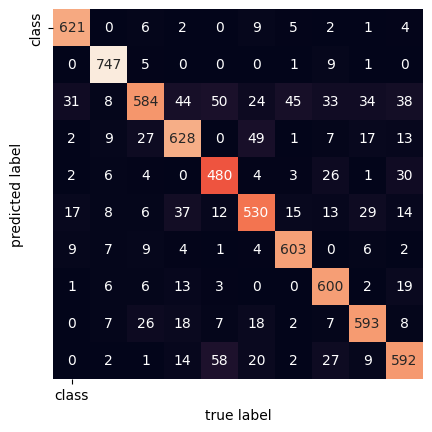

In [39]:

mat3 = confusion_matrix(y_test_90, y_pred_90)
sns.heatmap(mat3.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=mnist.target_names,
            yticklabels=mnist.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

### Pelabelan Citra

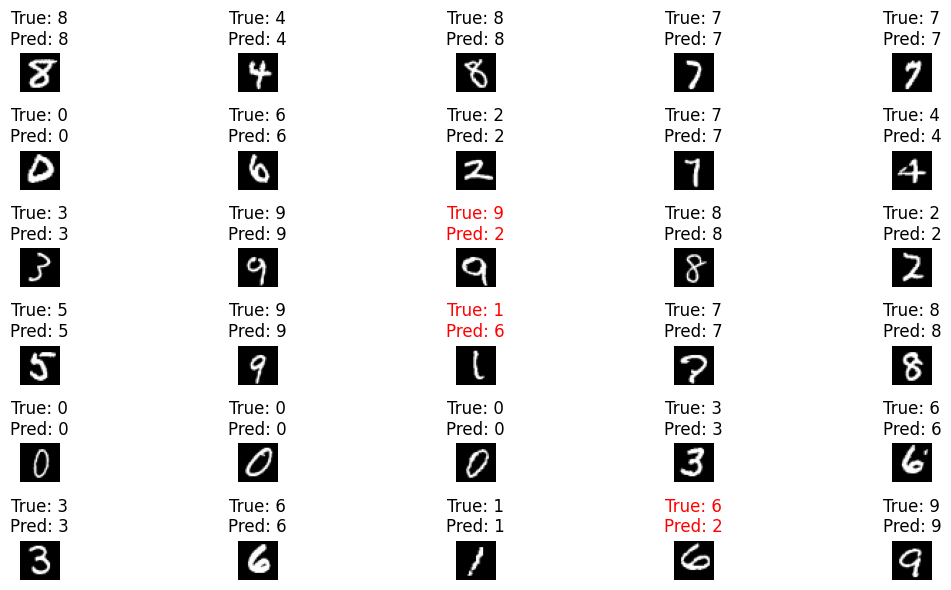

In [40]:
n_samples_to_display = 30
plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_test_90[i].reshape(28, 28), cmap="gray")

    true_label = y_test_90.iloc[i] if isinstance(y_test_90, pd.Series) else y_test_90[i]
    pred_label = y_pred_90.iloc[i] if isinstance(y_pred_90, pd.Series) else y_pred_90[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis("off")

plt.tight_layout()
plt.show()

**Metode SVM**

In [41]:
svc = SVC(C=1, gamma=0.001, kernel='linear')
svc.fit(X_train_90, y_train_90)

SVC(C=1, gamma=0.001, kernel='linear')

### Evaluasi Model

In [42]:
# Predict on the test set
y_pred_90 = svc.predict(X_test_90)

# Calculate accuracy
accuracy_90 = accuracy_score(y_test_90, y_pred_90)
print("Accuracy:", accuracy_90)

# Display classification report
print("Classification Report:")
print(classification_report(y_test_90, y_pred_90))

Accuracy: 0.9367142857142857
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       683
           1       0.96      0.98      0.97       800
           2       0.91      0.93      0.92       674
           3       0.90      0.92      0.91       760
           4       0.93      0.95      0.94       611
           5       0.91      0.90      0.91       658
           6       0.96      0.95      0.96       677
           7       0.94      0.94      0.94       724
           8       0.93      0.89      0.91       693
           9       0.95      0.92      0.93       720

    accuracy                           0.94      7000
   macro avg       0.94      0.94      0.94      7000
weighted avg       0.94      0.94      0.94      7000



### Confussion Matrix

Text(113.9222222222222, 0.5, 'predicted label')

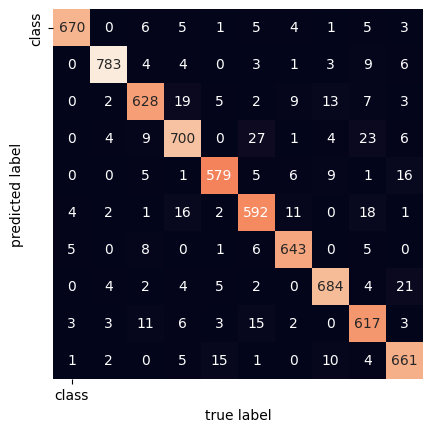

In [43]:

cm90 = confusion_matrix(y_test_90, y_pred_90)
sns.heatmap(cm90.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=mnist.target_names,
            yticklabels=mnist.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

### Pelabelan Citra

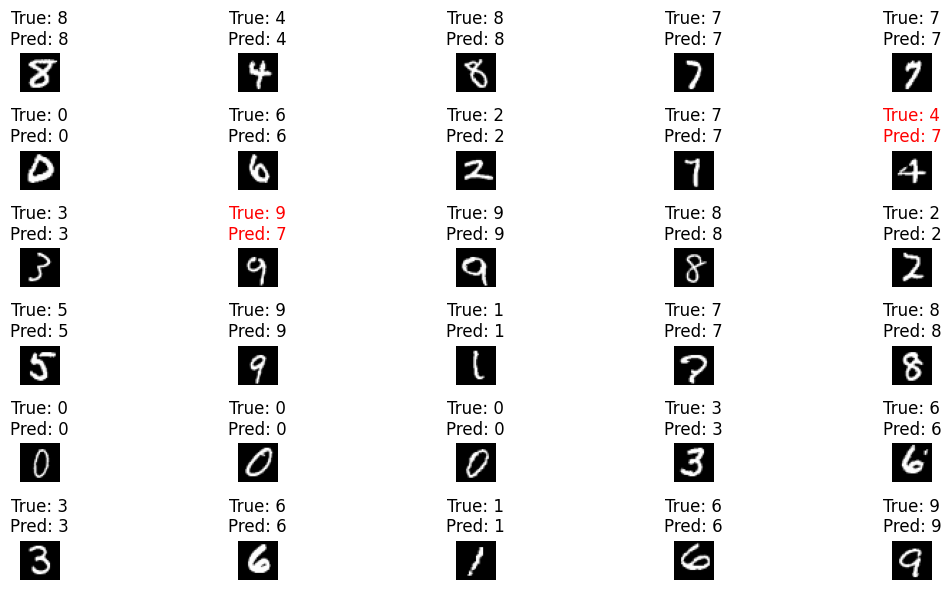

In [44]:
n_samples_to_display = 30
plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_test_90[i].reshape(28, 28), cmap="gray")

    true_label = y_test_90.iloc[i] if isinstance(y_test_90, pd.Series) else y_test_90[i]
    pred_label = y_pred_90.iloc[i] if isinstance(y_pred_90, pd.Series) else y_pred_90[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis("off")

plt.tight_layout()
plt.show()

# Nomor 8
Dalam studi kasus ini digunakan 2 metode yaitu Naive Bayes dan SVM kernel linear. Didapatkan hasil sebagai berikut :

- Pada ratio 70 : 30  
Hasil Naive Bayes Accuracy: 0.8562380952380952 <br>
Hasil SVM Accuracy: 0.9346666666666666 

- Pada ratio 80 : 20 <br>
Hasil Naive Bayes Accuracy: 0.8552857142857143<br>
Hasil SVM Accuracy:  0.9276428571428571

- Pada ratio 90 : 10 <br>
Hasil Naive Bayes Accuracy: 0.854<br>
Hasil SVM Accuracy: 0.9367142857142857

Dari hasil diatas dapat disimpulkan bahwa di ketiga ratio, model terbaik adalah SVM dengan kernel linear. Akurasi yang dihasilkan model ini lebih tinggi daripada model naive bayes. Konfigurasi mmodel SVM berparameter 'C' 1 dan 'gamma' yang digunakan 0.001. Model SVM unggul akurasinya di semua rasio dibandingkan model naive bayes.

